In [2]:
!pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 151.3 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/301.2 kB 286.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.2 kB 286.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/301.2 kB 286.7 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.2 kB 436.9 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/301.2 kB 504.4 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/301.2 kB 504.4 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 564.9 kB/s eta 0:00:00


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hebatuallah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Logistic Regression Accuracy: 0.8964
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Naive Bayes Accuracy: 0.8694
              precision    recall  f1-score   support

    negative       0.86      0.89      0.87      4961
    positive       0.88      0.85      0.87      5039

    accuracy                           0.87     10000
   macro av

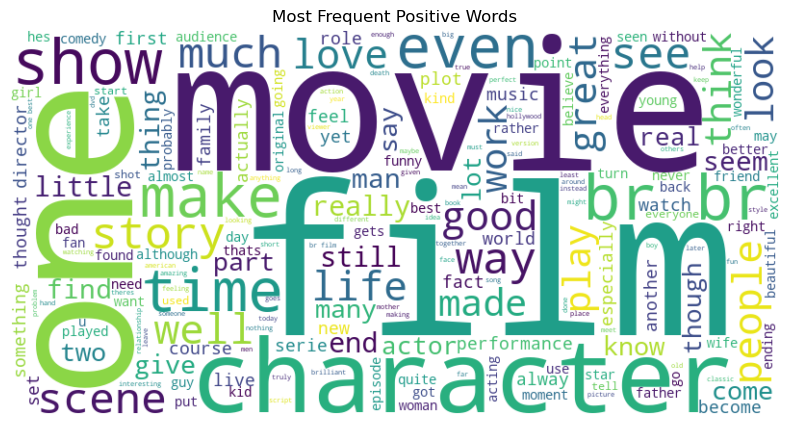

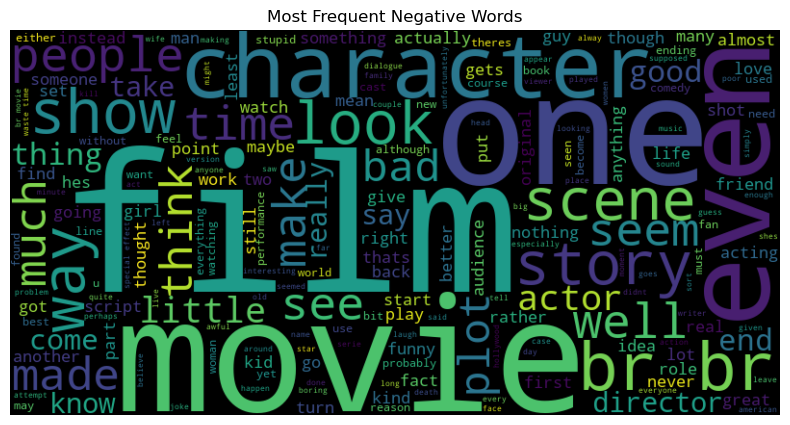

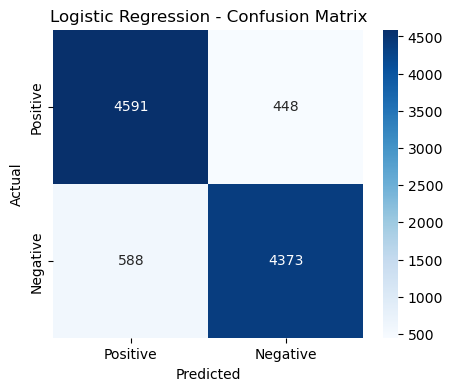

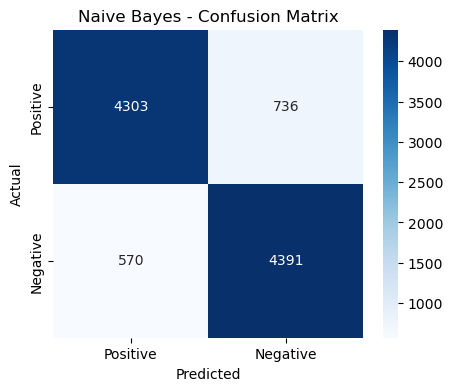

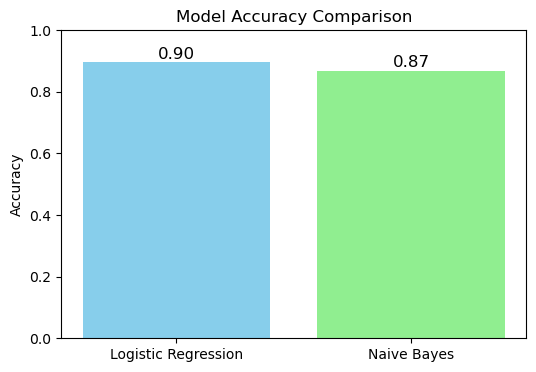

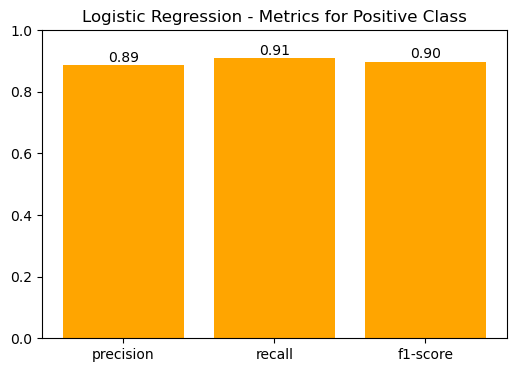

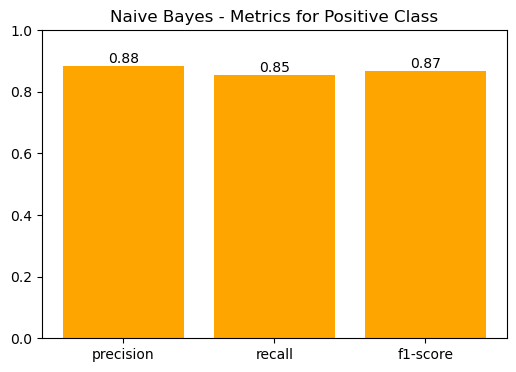

In [10]:
# 📌 Sentiment Analysis on IMDb Reviews (Full Jupyter Version with Visualizations)

# 0️⃣ Install Libraries (Run once if needed)
# pip install pandas numpy matplotlib scikit-learn wordcloud nltk seaborn

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import seaborn as sns

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# 2️⃣ Load IMDb Dataset
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())

# 3️⃣ Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned'] = df['review'].apply(clean_text)

# 4️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned'], df['sentiment'], test_size=0.2, random_state=42
)

# 5️⃣ TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 6️⃣ Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)

# 7️⃣ Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# 8️⃣ Print Reports
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# 9️⃣ WordClouds
positive_words = ' '.join(df[df['sentiment'] == 'positive']['cleaned'])
negative_words = ' '.join(df[df['sentiment'] == 'negative']['cleaned'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Positive Words")
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Negative Words")
plt.show()

# 🔟 Confusion Matrix Function
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=["positive", "negative"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Positive", "Negative"],
                yticklabels=["Positive", "Negative"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Plot Confusion Matrices
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_nb, "Naive Bayes")

# 1️⃣1️⃣ Accuracy Comparison Bar Chart
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Naive Bayes": accuracy_score(y_test, y_pred_nb)
}

plt.figure(figsize=(6,4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=["skyblue", "lightgreen"])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i, score in enumerate(accuracy_scores.values()):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', fontsize=12)
plt.show()

# 1️⃣2️⃣ Precision, Recall, and F1-score Visualization
def plot_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics = ["precision", "recall", "f1-score"]
    values = [report["positive"][m] for m in metrics]
    
    plt.figure(figsize=(6,4))
    plt.bar(metrics, values, color="orange")
    plt.ylim(0, 1)
    plt.title(f"{model_name} - Metrics for Positive Class")
    for i, v in enumerate(values):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
    plt.show()

# Plot metrics for both models
plot_metrics(y_test, y_pred_lr, "Logistic Regression")
plot_metrics(y_test, y_pred_nb, "Naive Bayes")
